<a href="https://colab.research.google.com/github/arielwendichansky/DI_Bootcamp/blob/master/Week8/Day4/Exrcise_XP/Exrcise_XP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [173]:
# 1. to handle the data
import numpy as np
import pandas as pd

#2. To plot the data
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import math
from plotnine import (ggplot,aes,geom_line,facet_wrap,labs, scale_x_datetime, element_text, theme_538)
from plotnine.data import meat

# 3. import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

# 4. machine learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# 5. for accuracy score
from sklearn.metrics import confusion_matrix, f1_score, recall_score,precision_score
from sklearn.metrics import roc_curve, roc_auc_score

# Importing data from Kaggle


In [8]:
! pip install -k kaggle
from google.colab import files
files.upload()


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -k


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"arielwendichansky","key":"35f486beabeea6fcb79285bc7f95d018"}'}

In [9]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [10]:
! kaggle datasets download -d redwankarimsony/heart-disease-data

Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
License(s): copyright-authors
  0% 0.00/12.4k [00:00<?, ?B/s]
100% 12.4k/12.4k [00:00<00:00, 23.5MB/s]


In [11]:
!unzip 'heart-disease-data.zip'

Archive:  heart-disease-data.zip
  inflating: heart_disease_uci.csv   


In [12]:
df = pd.read_csv('heart_disease_uci.csv')

# Initial Data Exploration

In [13]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,920.0,460.500000,265.725422,1.0,230.75,460.5,690.25,920.0
age,920.0,53.510870,9.424685,28.0,47.00,54.0,60.00,77.0
trestbps,861.0,132.132404,19.066070,0.0,120.00,130.0,140.00,200.0
chol,890.0,199.130337,110.780810,0.0,175.00,223.0,268.00,603.0
thalch,865.0,137.545665,25.926276,60.0,120.00,140.0,157.00,202.0
oldpeak,858.0,0.878788,1.091226,-2.6,0.00,0.5,1.50,6.2
ca,309.0,0.676375,0.935653,0.0,0.00,0.0,1.00,3.0
num,920.0,0.995652,1.142693,0.0,0.00,1.0,2.00,4.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [16]:
df.duplicated().sum()

0

# Dealing with missing values

In [17]:
# Replacing categorical values so to use iterativeimputer for null values
print(df['slope'].unique())
print(df['thal'].unique())
print(df['restecg'].unique())

df['slope'].replace({'downsloping':0, 'flat':1, 'upsloping':2}, inplace=True)
df['thal'].replace({'fixed defect':0, 'normal':1, 'reversable defect':2}, inplace=True)
df['restecg'].replace({'lv hypertrophy':0, 'normal':1, 'st-t abnormality':2}, inplace=True)

['downsloping' 'flat' 'upsloping' nan]
['fixed defect' 'normal' 'reversable defect' nan]
['lv hypertrophy' 'normal' 'st-t abnormality' nan]


In [18]:
# Replacing boolean values so to use iterativeimputer for null values
df['fbs'].replace({True: 1, False: 0}, inplace=True)
df['exang'].replace({True: 1, False: 0}, inplace=True)

In [19]:
# Checking current columns with missing values and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    float64
 8   restecg   918 non-null    float64
 9   thalch    865 non-null    float64
 10  exang     865 non-null    float64
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    float64
 13  ca        309 non-null    float64
 14  thal      434 non-null    float64
 15  num       920 non-null    int64  
dtypes: float64(10), int64(3), object(3)
memory usage: 115.1+ KB


In [20]:
# Columns with missing values
null_columns = df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=True)
null_columns = null_columns.index.tolist()
null_columns

['restecg',
 'chol',
 'thalch',
 'exang',
 'trestbps',
 'oldpeak',
 'fbs',
 'slope',
 'thal',
 'ca']

In [23]:
# Impute the missing values for column whit flot or int type values, using iterative imputer
# Create iteratvie imputer object
imputer = IterativeImputer(max_iter=10, random_state=42)

# Fit the imputer to the columns with float or int type values
for col in null_columns:
  df[col] = imputer.fit_transform(df[[col]])

In [24]:
# Checking current columns with missing values
df.isnull().sum().sort_values(ascending=False)

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

No null values, now changing the categorical values to the original ones

In [25]:
# For categorical values
df['slope']=df['slope'].round()
df['thal']=df['thal'].round()
df['restecg']=df['restecg'].round()

df['slope'].replace({0:'downsloping', 1:'flat', 2:'upsloping'}, inplace=True)
df['thal'].replace({0:'fixed defect', 1:'normal', 2:'reversable defect'}, inplace=True)
df['restecg'].replace({0:'lv hypertrophy', 1:'normal', 2:'st-t abnormality'}, inplace=True)

print(df['slope'].value_counts())
print(df['thal'].value_counts())
print(df['restecg'].value_counts())

slope
flat           654
upsloping      203
downsloping     63
Name: count, dtype: int64
thal
normal               682
reversable defect    192
fixed defect          46
Name: count, dtype: int64
restecg
normal              553
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64


In [26]:
# For boolean values
df['fbs'] = df['fbs']. round()
df['exang'] = df['exang'].round()

df['fbs'].replace({1: True, 0: False}, inplace=True)
df['exang'].replace({1: True, 0: False}, inplace=True)

print(df['fbs'].value_counts())
print(df['exang'].value_counts())

fbs
False    782
True     138
Name: count, dtype: int64
exang
False    583
True     337
Name: count, dtype: int64


In [27]:
# find Numerical Columns
num_cols = df.select_dtypes(exclude='object')
print('Numerical Columns: ',num_cols.columns.tolist())
# find Categorical Columns
cat_cols = df.select_dtypes(include='object')
print('Categorical Columns: ',cat_cols.columns.tolist())


Numerical Columns:  ['id', 'age', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak', 'ca', 'num']
Categorical Columns:  ['sex', 'dataset', 'cp', 'restecg', 'slope', 'thal']


In [ ]:
# Function to impute  missing values in categorical columns

def impute_missing_values(input_columns):
  df_not_null = df[df[input_columns].notnull()]
  df_is_null = df[df[input_columns].isnull()]

  X = df_not_null.drop(input_columns, axis=1)
  y = df_not_null[input_columns]

  other_columns = [col for col in null_columns if col != input_columns]
  label_encoder = LabelEncoder()

  for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

  for col in y.columns:
    if y[col].dtype ==


#Dealing with outliers

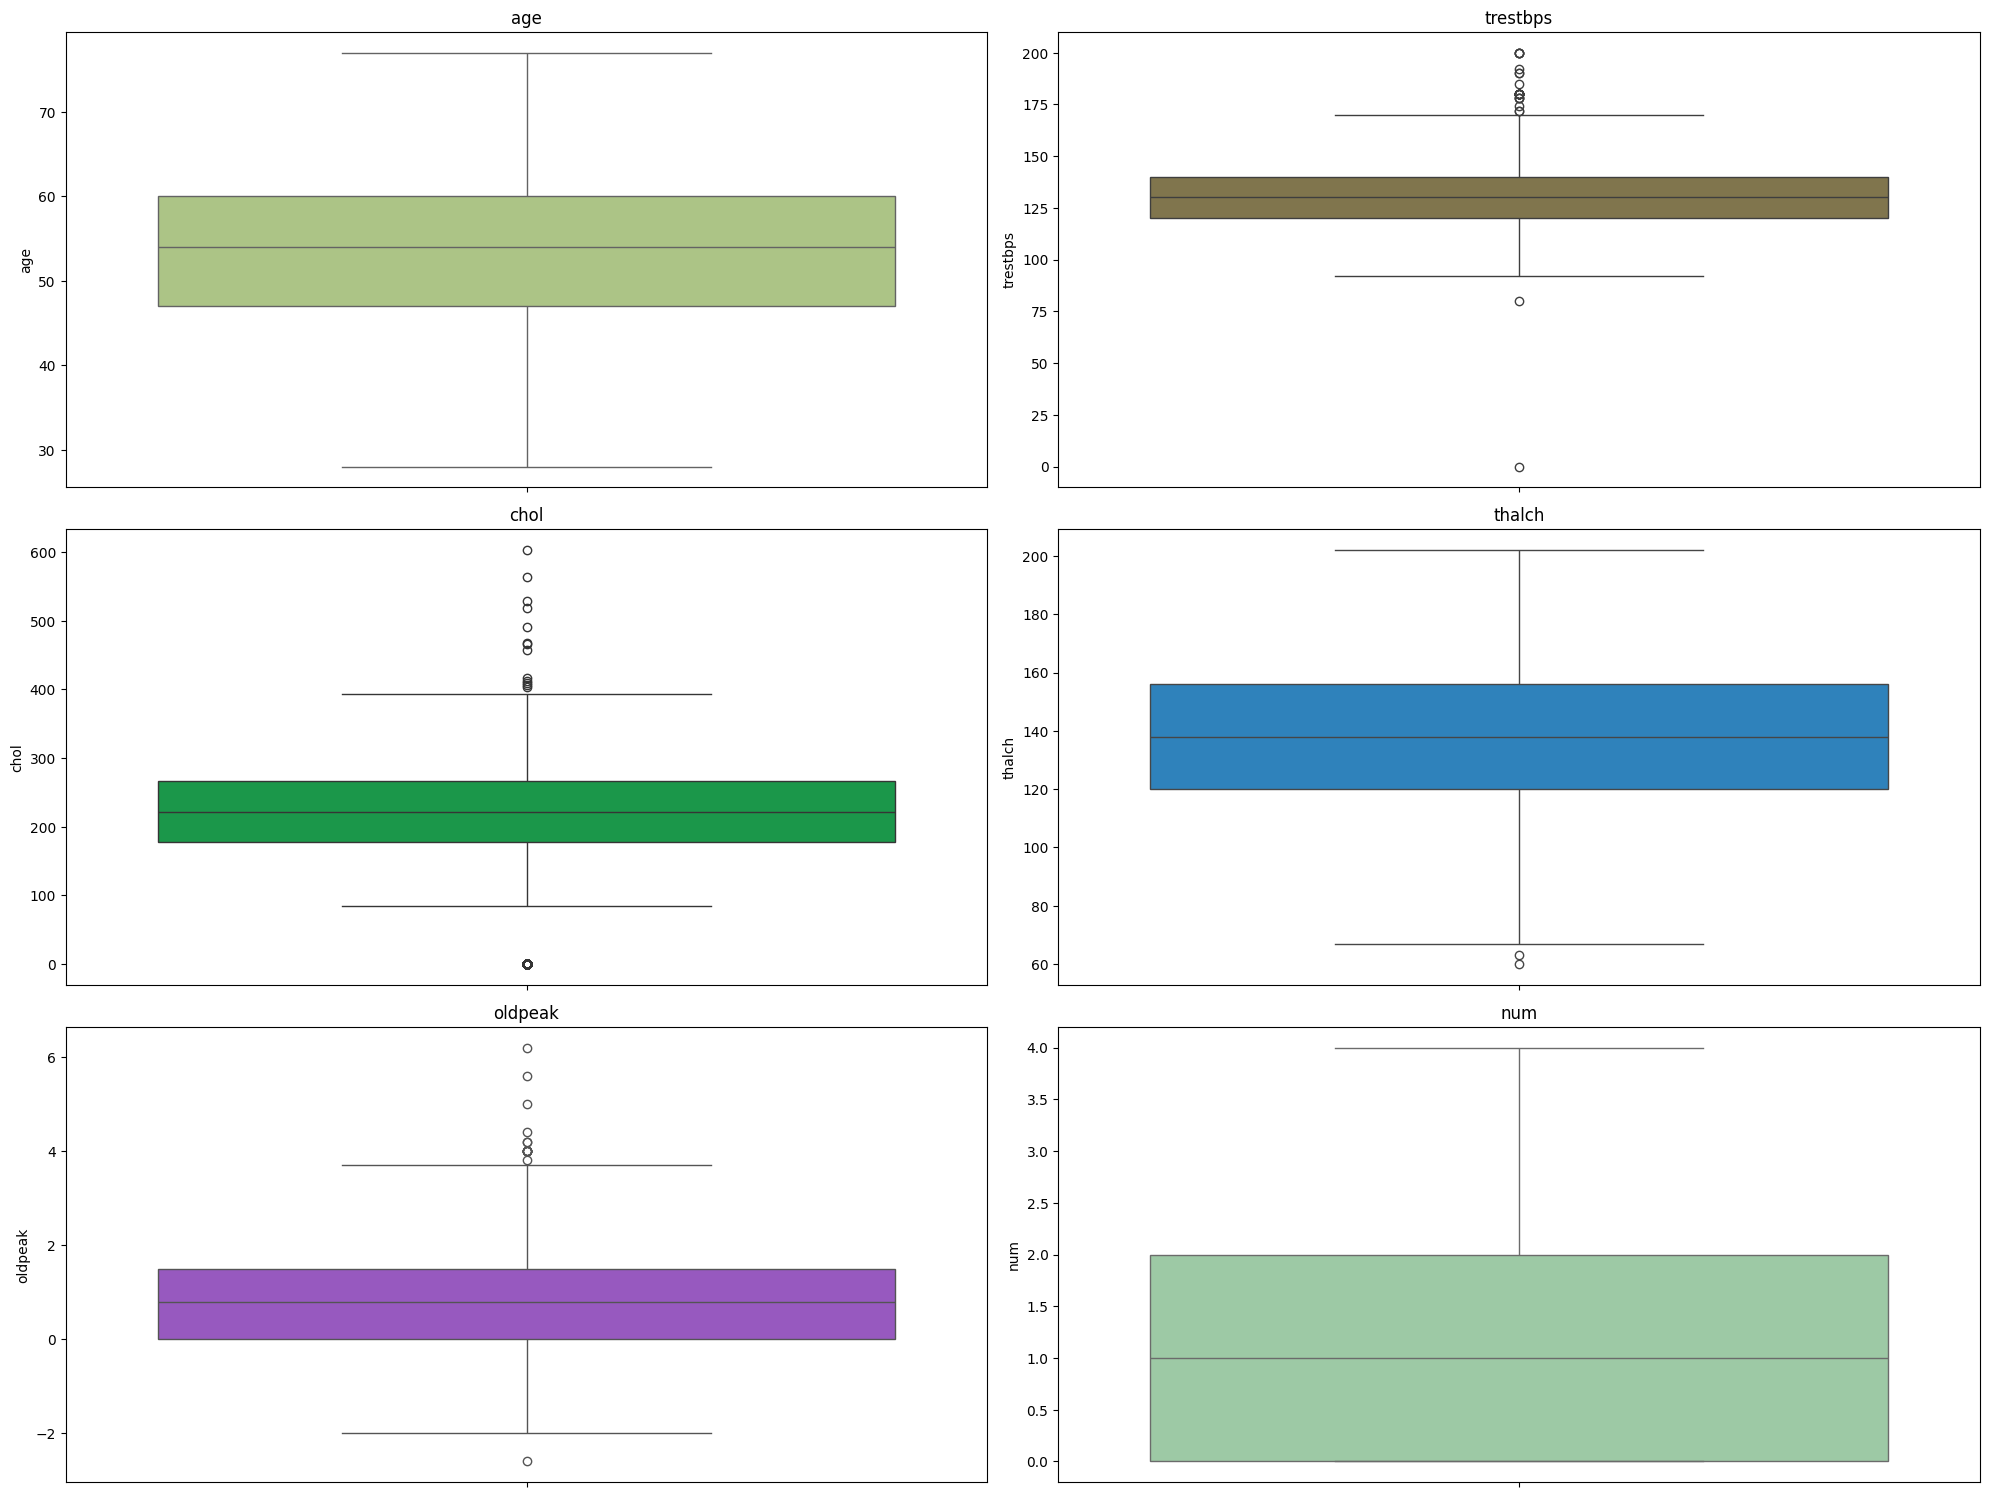

In [28]:
numerical_columns = df.select_dtypes(exclude=['object', 'bool']).drop(columns=['id', 'ca'])

plt.figure(figsize=(20, 20))


for i, col in enumerate(numerical_columns):
    #Generate random colors for each value
    random_color = np.random.rand(3,)

    plt.subplot(4, 2, i+1)
    sns.boxplot(data=df, y=col, color=random_color)
    plt.title(col)
    plt.tight_layout()

plt.show()


In [159]:
cdata = df.copy()

In [160]:
# Replacing those rows where cholesterol is equal to 0
zero_chol_rows = cdata['chol'] == 0

# Find the mode of non-zero cholesterol values
mode_chol = cdata[cdata['chol'] != 0]['chol'].mode().values[0]

# Replace zero cholesterol values in cdata with the mode of non-zero cholesterol values
cdata.loc[zero_chol_rows, 'chol'] = mode_chol

In [161]:
#Checking the change above
(cdata['chol']==0).sum()

0

Here's a breakdown of average total cholesterol levels by category:

* Desirable: Less than 200 mg/dL
* Borderline high: 200 to 239 mg/dL
* High: 240 mg/dL and above

In [162]:
def minmax_outlier_detection(data):
    # Calculate Q1 and Q3
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Define lower and upper fences
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    # Create a boolean mask to identify rows without outliers
    mask = ~((data < lower_fence) | (data > upper_fence))

    # Return the boolean mask
    return mask

# Apply outlier detection to each column and update cdata
mask_chol = minmax_outlier_detection(cdata['chol'])
mask_trestbps = minmax_outlier_detection(cdata['trestbps'])
mask_oldpeak = minmax_outlier_detection(cdata['oldpeak'])

# Combine masks to identify rows without outliers in any column
combined_mask = mask_chol & mask_trestbps & mask_oldpeak

# Filter cdata to keep rows without outliers
cdata = cdata[combined_mask]

# Print count of non-null values after outlier removal
print(cdata.count())

id          858
age         858
sex         858
dataset     858
cp          858
trestbps    858
chol        858
fbs         858
restecg     858
thalch      858
exang       858
oldpeak     858
slope       858
ca          858
thal        858
num         858
dtype: int64


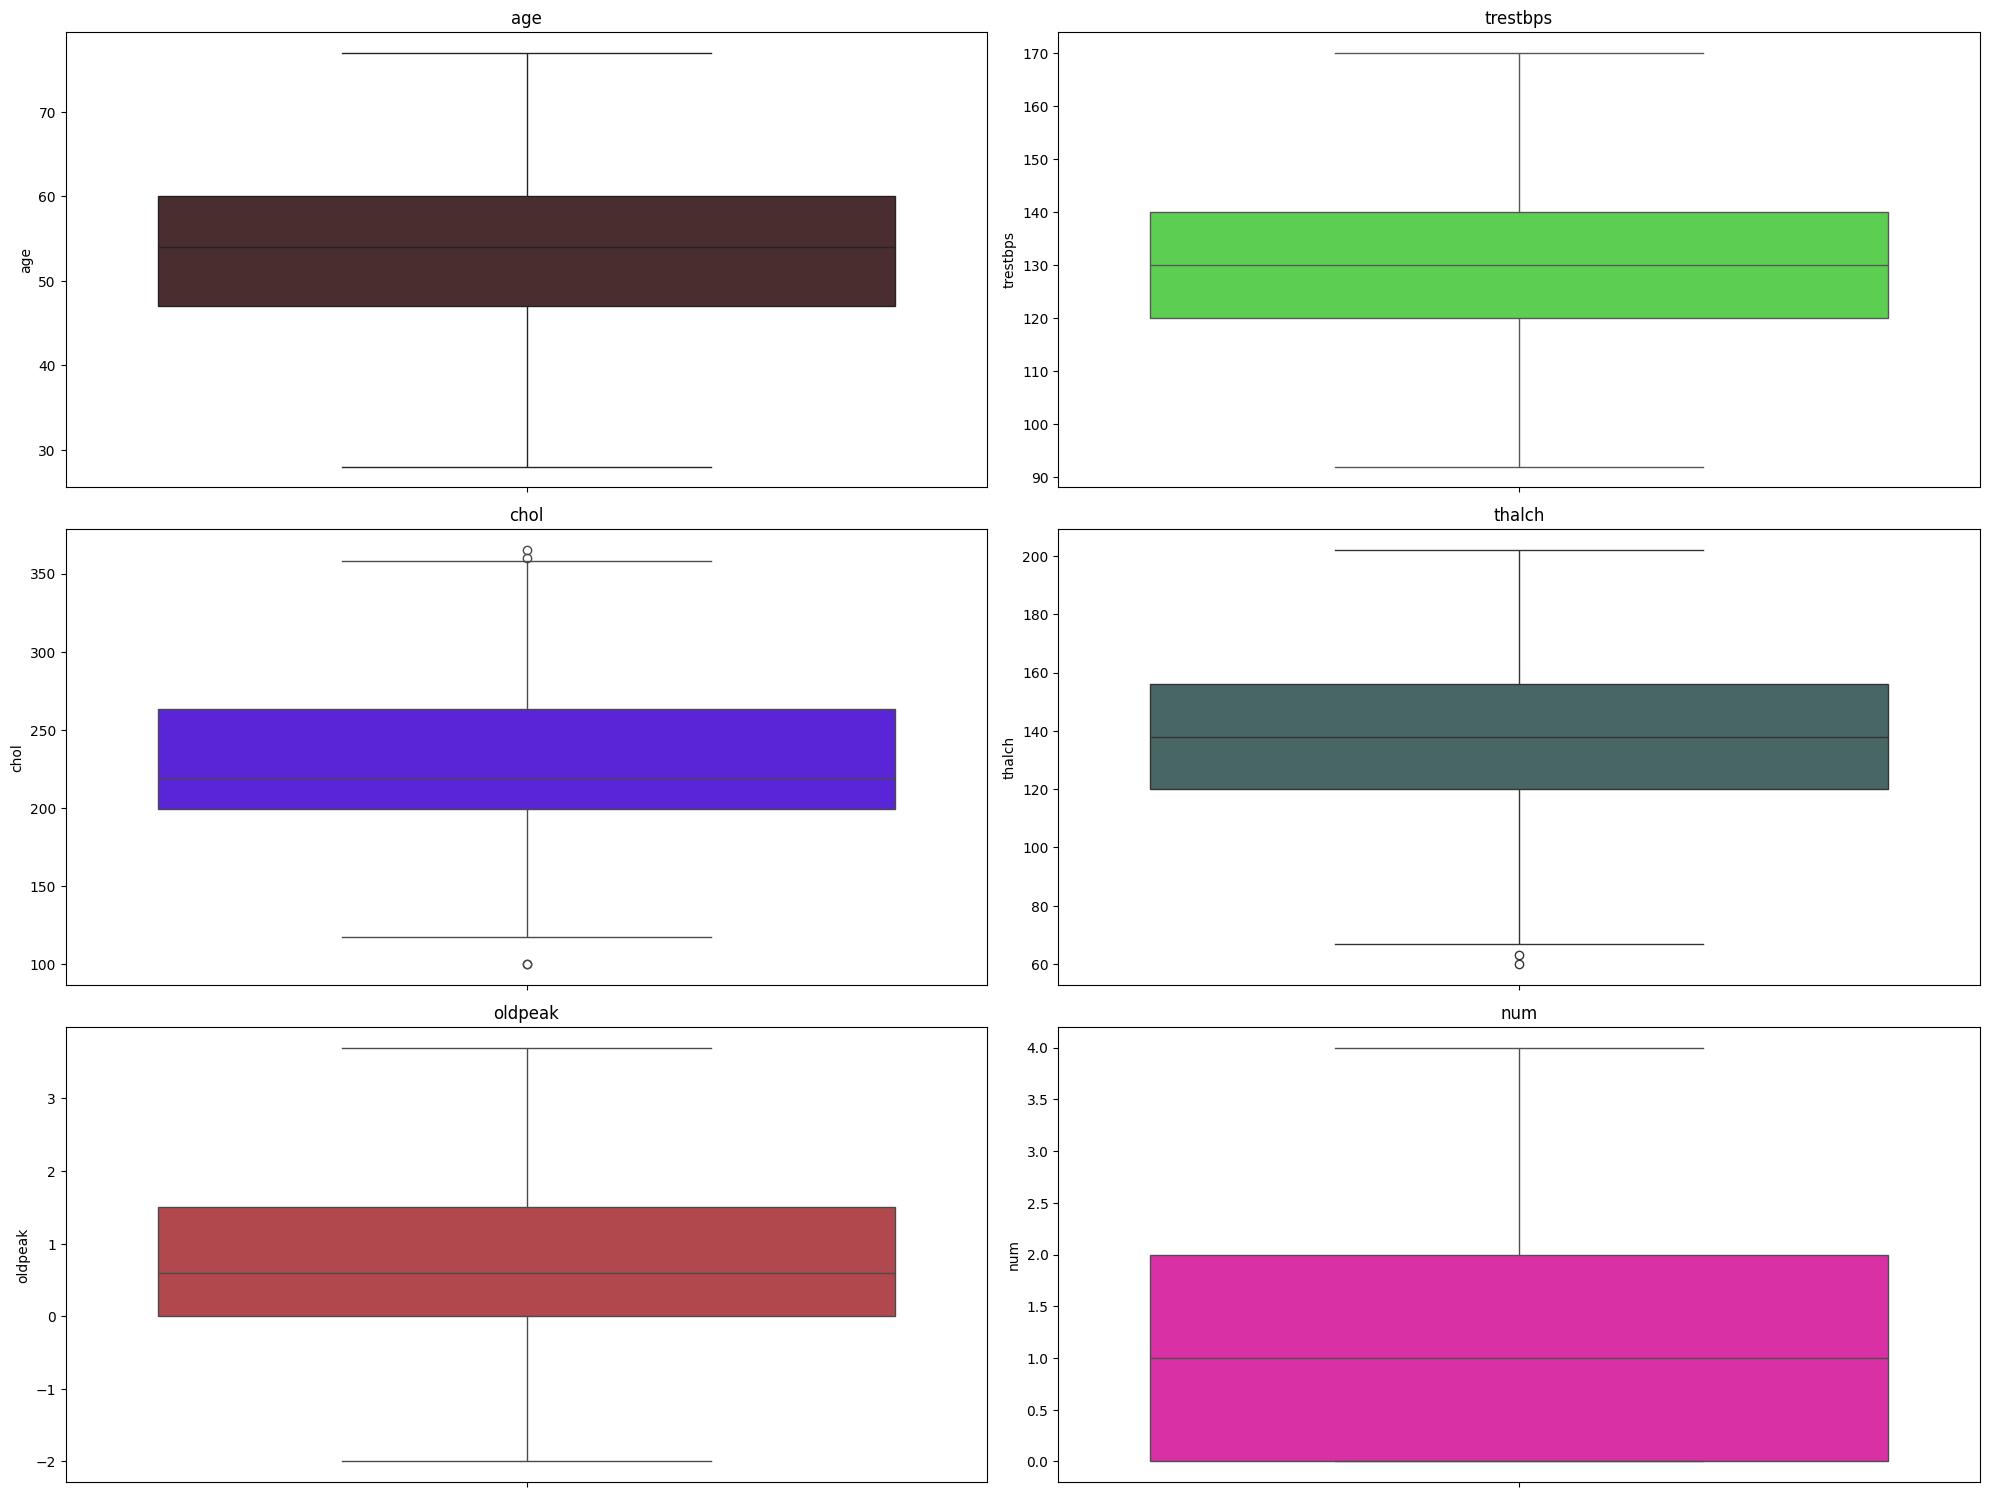

In [163]:
numerical_columns = df.select_dtypes(exclude=['object', 'bool']).drop(columns=['id', 'ca'])

plt.figure(figsize=(20, 20))


for i, col in enumerate(numerical_columns):
    #Generate random colors for each value
    random_color = np.random.rand(3,)

    plt.subplot(4, 2, i+1)
    sns.boxplot(data=cdata, y=col, color=random_color)
    plt.title(col)
    plt.tight_layout()

plt.show()

# Explore Data Analysis (EDA)

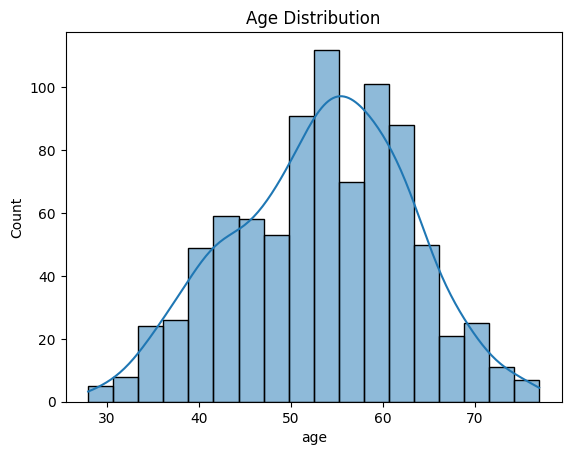

In [164]:
sns.histplot(data=cdata, x='age',  kde=True)
plt.title('Age Distribution')
plt.show()

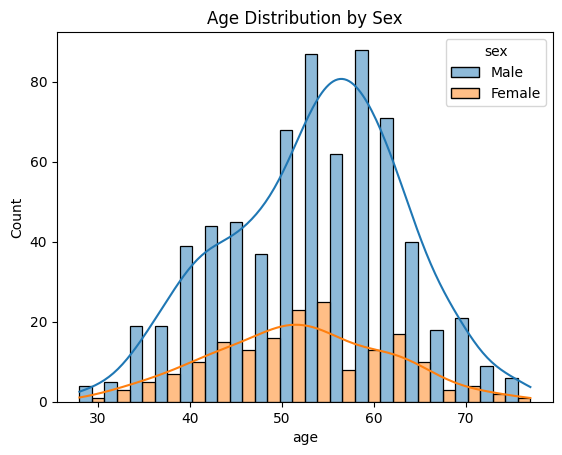

In [165]:
sns.histplot(data=cdata, x='age', hue='sex', multiple='dodge', kde=True,)
plt.title('Age Distribution by Sex')
plt.show()

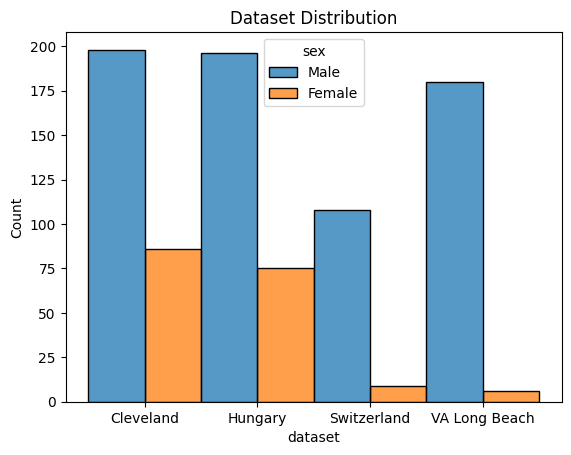

In [166]:
sns.histplot(data=cdata, x='dataset', hue='sex',  multiple='dodge')
plt.title('Dataset Distribution')
plt.show()

Rest BPS mean for Male: 228.38700780915354
Rest BPS mean for Female: 241.91525791624107


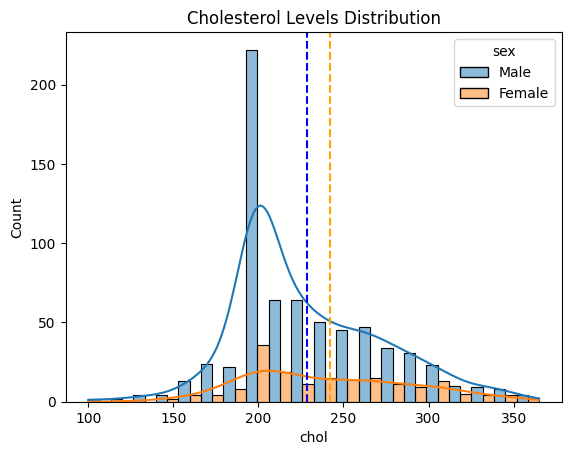

In [167]:
sns.histplot(data=cdata, x='chol',hue='sex', multiple='dodge',  kde=True)
plt.axvline(cdata['chol'][cdata['sex']=='Male'].mean(), color='blue', linestyle='--', label='mean')
plt.axvline(cdata['chol'][cdata['sex']=='Female'].mean(), color='orange', linestyle='--', label='mean')
plt.title('Cholesterol Levels Distribution')
print('Rest BPS mean for Male:', cdata['chol'][cdata['sex']=='Male'].mean())
print('Rest BPS mean for Female:', cdata['chol'][cdata['sex']=='Female'].mean())

# Machine Learning prediction

The Targeted column is num which is the predicted attribute. We will use this column to predict the heart disease. The unique values in this column are: [0,1,2,3,4], which states that there are 5 types of heart diseases.

0 = no heart disease.

1 = Mild Heart Disease types.

2 = Moderate Heart Disease type.

3 =  Severe Heart Disease type.

4 =  Critical Heart Disease type

In [168]:
# split the data into X and y
X= cdata.drop('num', axis=1)
y = cdata['num']

# Encode all categorical values for model creation.
Label_Encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = Label_Encoder.fit_transform(X[col])
    else:
        pass


# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

Model to use and predict the hearth deseas for multi_class classification.

* logistic regression.
* KNN
* NB
* SVM
* Decision Tree
* Random Forest
* XGBoost
* GradientBoosting
* AdaBoost
* lightGBM

In [169]:
# improt ALl models.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB

#importing pipeline
from sklearn.pipeline import Pipeline

# import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error

In [170]:
cdata.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [171]:
# create a list of models to evaluate

models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('KNeighbors Classifier', KNeighborsClassifier()),
    ('Decision Tree Classifier', DecisionTreeClassifier(random_state=42)),
    ('AdaBoost Classifier', AdaBoostClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('XGboost Classifier', XGBClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Naye base Classifier', GaussianNB())


]

best_model = None
best_accuracy = 0.0

#Iterate over the models and evaluate their performance
for name, model in models:
    #create a pipeline for each model
    pipeline = Pipeline([
        # ('imputer', SimpleImputer(strategy='most_frequent)),
        #('encoder', OneHotEncoder(handle_unknow='ignore'))
        ('model', model)
    ])

    # perform cross validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)

    # Calculate mean accuracy
    mean_accuracy = scores.mean()

    #fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # make prediction on the test data
    y_pred = pipeline.predict(X_test)

    #Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    #print the performance metrics
    print("Model", name)
    print("Cross Validatino accuracy: ", mean_accuracy)
    print("Test Accuracy: ", accuracy)
    print()

    #Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model: ", best_model)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
/usr/local/lib/python3.10/dist-packages/sklearn/line

Model Logistic Regression
Cross Validatino accuracy:  0.5413992459153749
Test Accuracy:  0.4418604651162791

Model Gradient Boosting
Cross Validatino accuracy:  0.6217679095098451
Test Accuracy:  0.5930232558139535

Model KNeighbors Classifier
Cross Validatino accuracy:  0.5971428571428572
Test Accuracy:  0.5697674418604651

Model Decision Tree Classifier
Cross Validatino accuracy:  0.6087725178047758
Test Accuracy:  0.5348837209302325

Model AdaBoost Classifier
Cross Validatino accuracy:  0.5946292417260158
Test Accuracy:  0.6162790697674418

Model Random Forest
Cross Validatino accuracy:  0.645060745705907
Test Accuracy:  0.627906976744186

Model XGboost Classifier
Cross Validatino accuracy:  0.6295266024298283
Test Accuracy:  0.5813953488372093

Model Support Vector Machine
Cross Validatino accuracy:  0.6022957687473818
Test Accuracy:  0.5232558139534884

Model Naye base Classifier
Cross Validatino accuracy:  0.5024633431085044
Test Accuracy:  0.4069767441860465

Best Model:  Pipeli

Evaluate the model on the testing set using accuracy, precision, recall, and F1 score.
Use a confusion matrix to visualize the model’s performance.

In [179]:
# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Predict the target labels on the testing data
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Accuracy: 0.627906976744186
Precision: 0.6030734446432121
Recall: 0.627906976744186
F1 Score: 0.6005733658478558


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
